# EnrichMap tutorial for multiple samples

This tutorial demonstrates how to use `EnrichMap` with multiple slides. Refer to [EnrichMap tutorial for one sample](one_sample.ipynb) to learn how to use a single or multiple gene sets.

In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore" # suppress warnings

In [2]:
import warnings
warnings.filterwarnings("ignore") # suppress warnings

Import required packages for minimal example.

In [3]:
import scanpy as sc
import enrichmap as em

In [4]:
sc.set_figure_params(dpi=100, facecolor=None, color_map="seismic", frameon=False, vector_friendly=True, transparent=True)
sc.settings._vector_friendly = False # To fix an issue with vector graphics in some versions of Scanpy

Read in the dataset:

In [ ]:
adata = sc.read_h5ad("adata_slides_0_3.h5ad")

As the data shared with raw counts, we normalise the counts.

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

Here, we investigate epithelial to mesenchymal transition (EMT). We use three gene sets for epithelial, hybrid and mesenchymal states.

In [7]:
# Malagoli Tagliazucchi, G. et al. (2023) Nat Commun https://doi.org/10.1038/s41467-023-36439-7
Hybrid = ["PDPN", "ITGA5", "ITGA6", "TGFBI", "LAMC2", "MMP10", "LAMA3", "CDH13", "SERPINE1", "P4HA2", "TNC", "MMP1"]
Mesenchymal = ["VIM", "FOXC2", "SNAI1", "SNAI2", "TWIST1", "FN1", "ITGB6", "MMP2", "MMP3", "MMP9", "SOX10", "GCS", "ZEB1", "ZEB2", "TWIST2"]
Epithelial = ["CDH1", "DSP", "OCLN", "CRB3"]

In [8]:
signature_dict = {
    "Hybrid": Hybrid,
    "Mesenchymal": Mesenchymal,
    "Epithelial": Epithelial
}

### EnrichMap

We now calculate `EnrichMap` scores for the three signatures. As there are more than one slide in this dataset, we specify the batch information stored in `adata.obs`.

In [9]:
em.tl.score(
    adata,
    gene_set=signature_dict,
    batch_key="batch" # make sure to specify the batch key
)

Scoring signatures: 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]


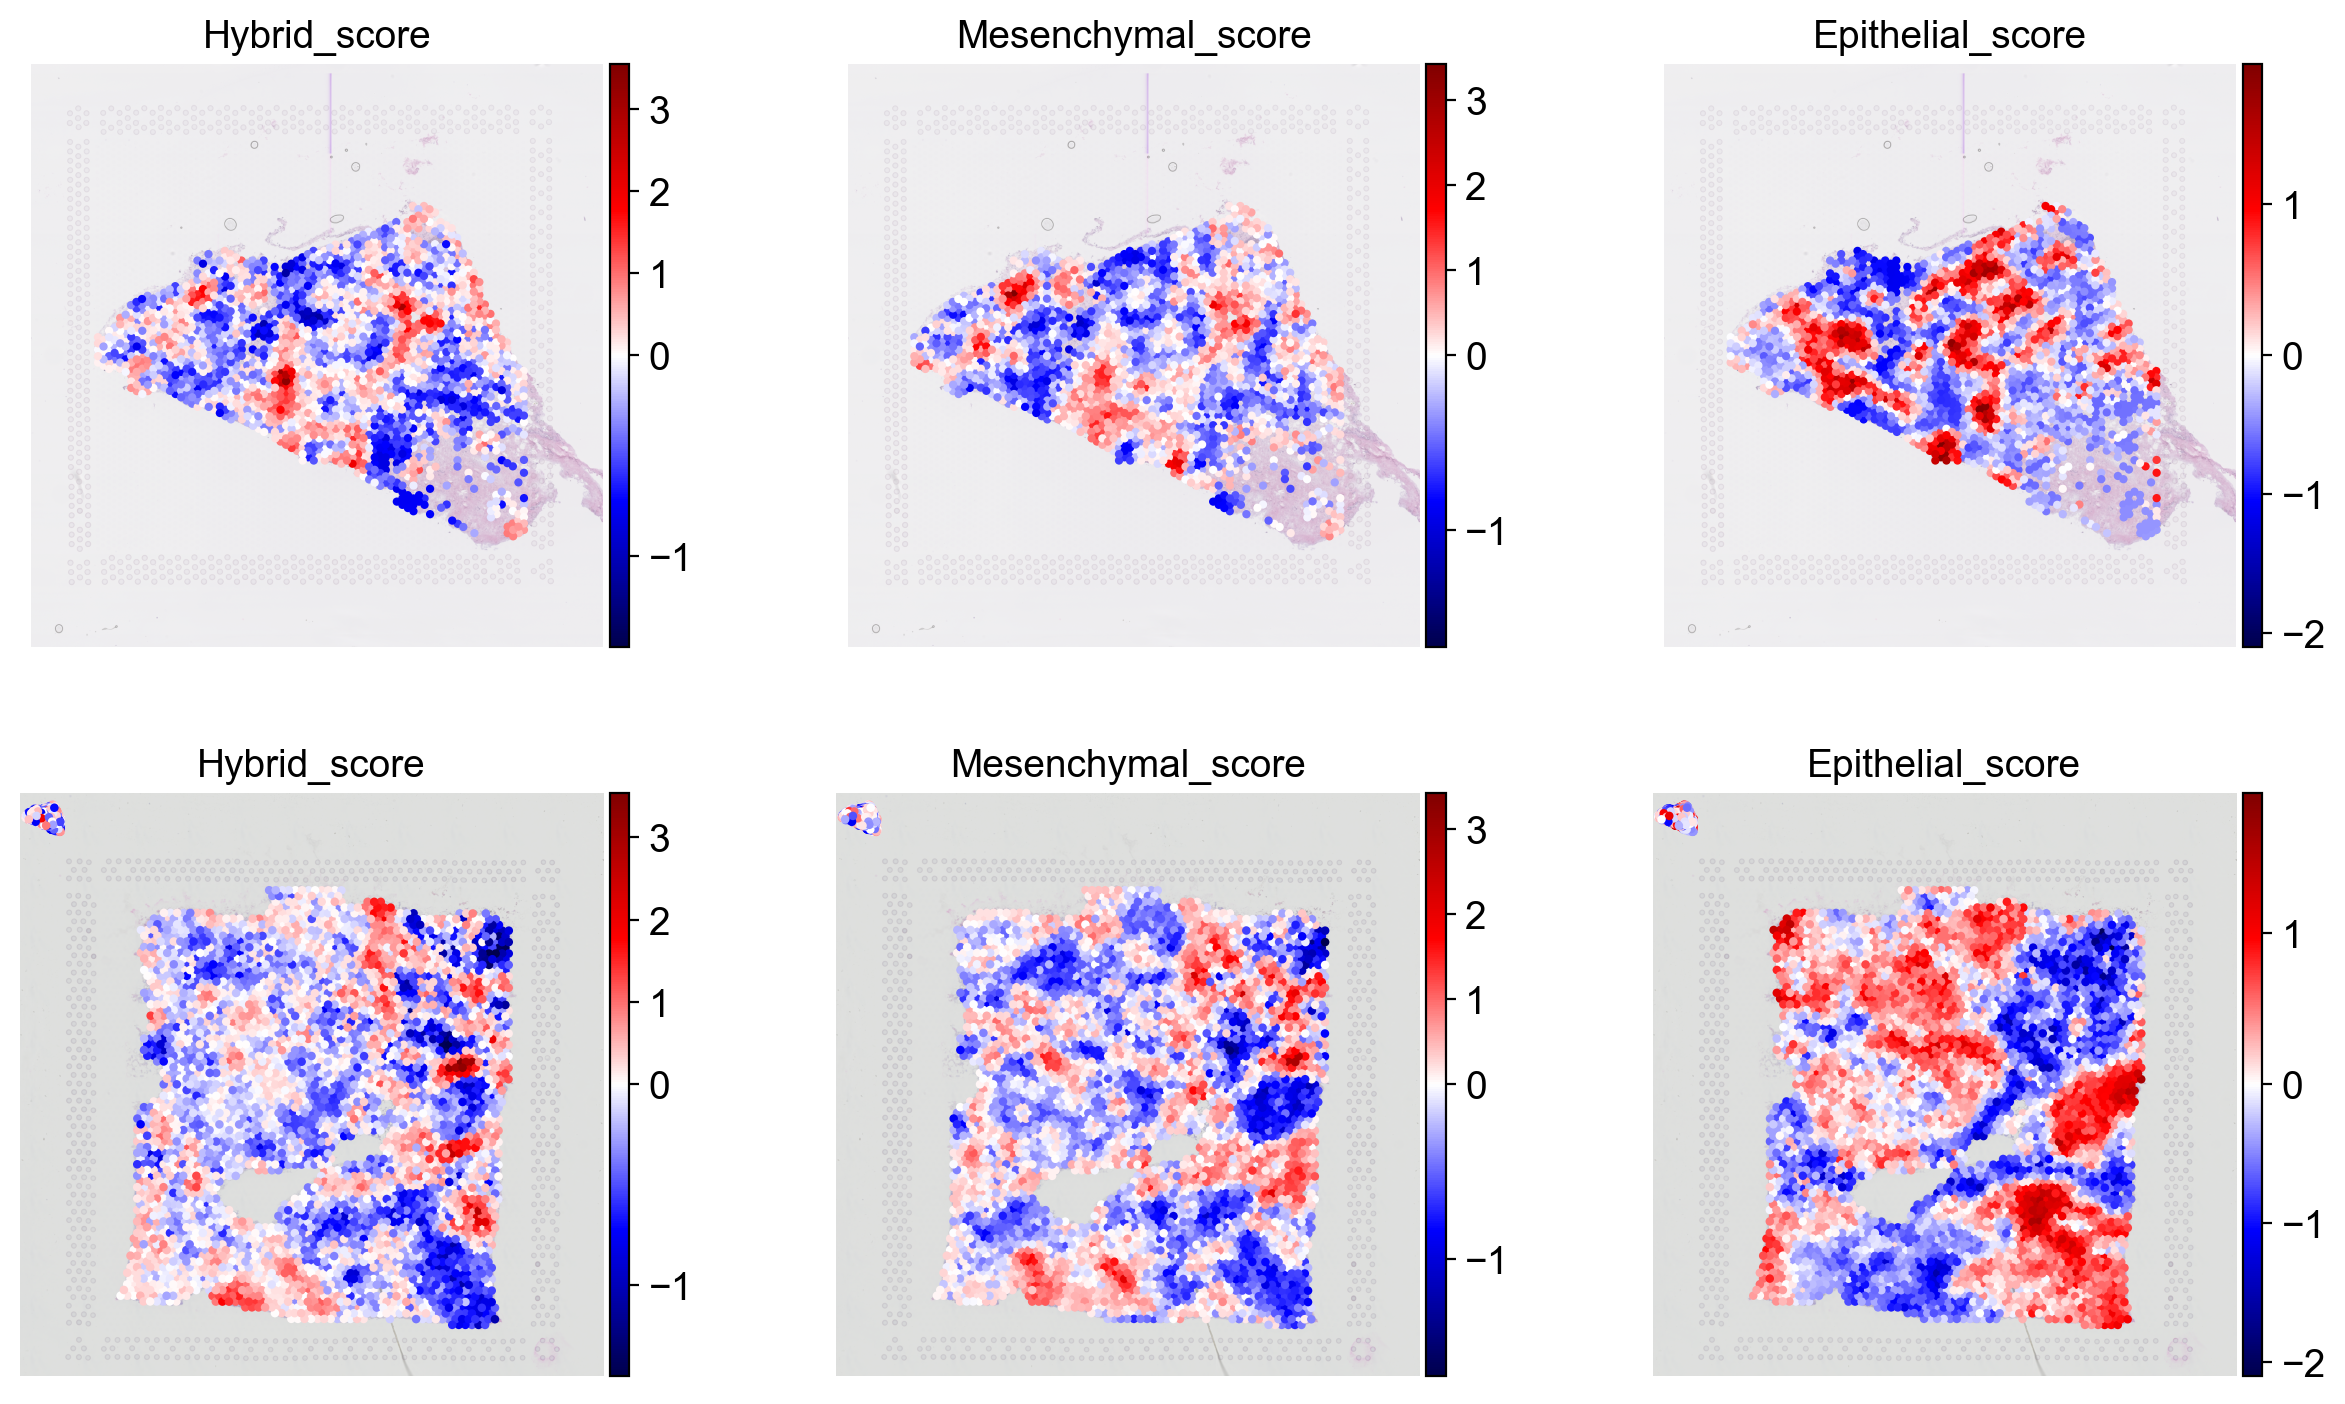

In [10]:
em.pl.spatial_enrichmap(
    adata,
    score_key=["Hybrid_score", "Mesenchymal_score", "Epithelial_score"],
    size=2,
    library_key="library_id", # to plot multiple libraries
    library_id=["0", "3"], # specify the libraries to plot
    img_alpha=0.5
)

Let"s now investigate what genes influenced the hybrid state the most. Here, we demonstrate top three genes.

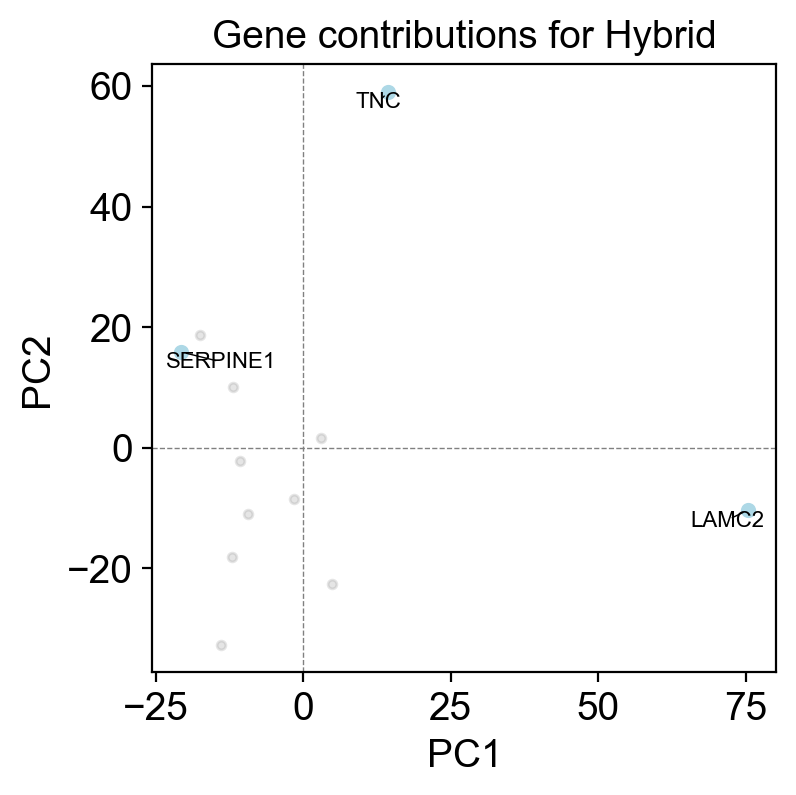

In [11]:
em.pl.gene_contributions_pca(
    adata,
    score_key="Hybrid_score",
    top_n_genes=3
)

Here's the individual gene expression for top three genes.

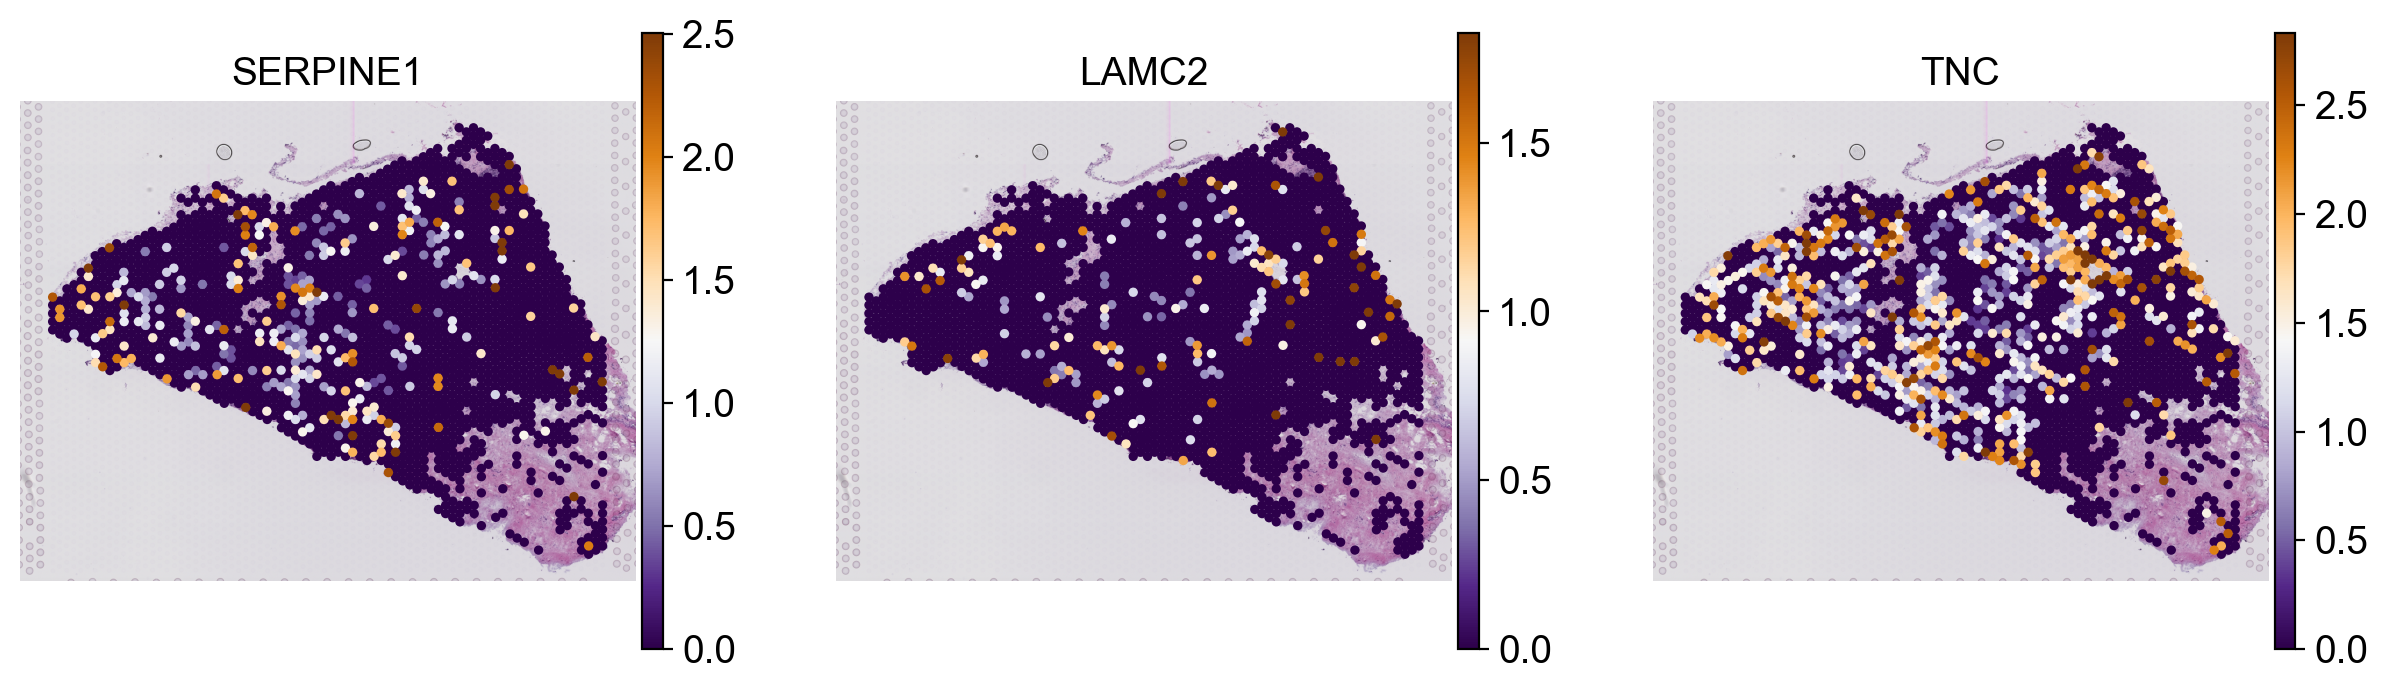

In [12]:
sc.pl.spatial(
    adata[adata.obs["batch"] == "0"],
    color=["SERPINE1", "LAMC2", "TNC"],
    library_id="0",
    size=1.75,
    ncols=3,
    cmap="PuOr_r",
    vmax="p99.2",
    vmin=0,
)

`EnrichMap` also implements a function to correlate multiple signatures to investigate co-acting biological pathways.

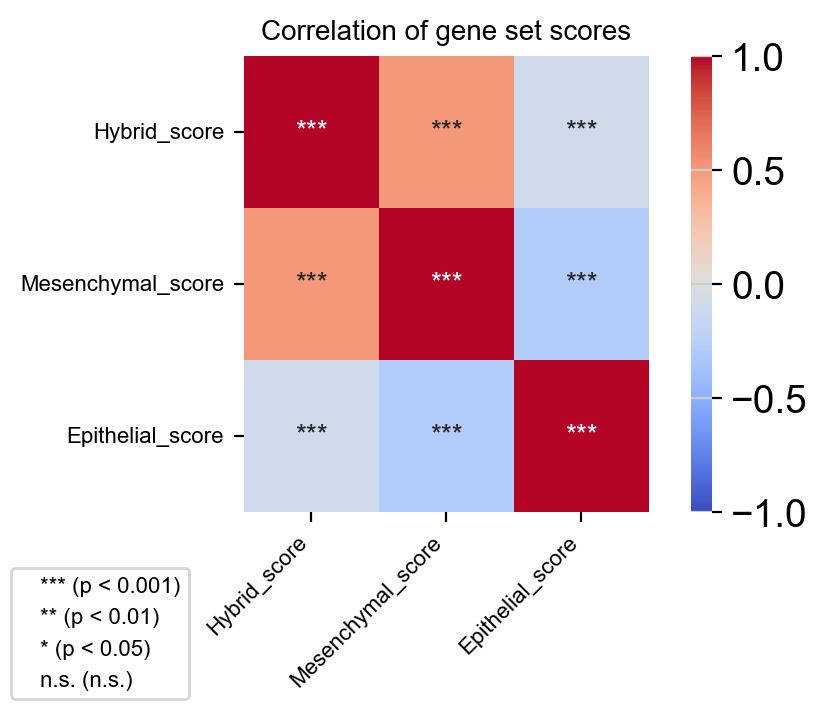

In [13]:
em.pl.signature_correlation_heatmap(
    adata,
    score_keys=["Hybrid_score", "Mesenchymal_score", "Epithelial_score"],
    figsize=(3, 3)
)

The heatmap above shows correlation between signatures across all slides. However, one might want to investigate this per slide.

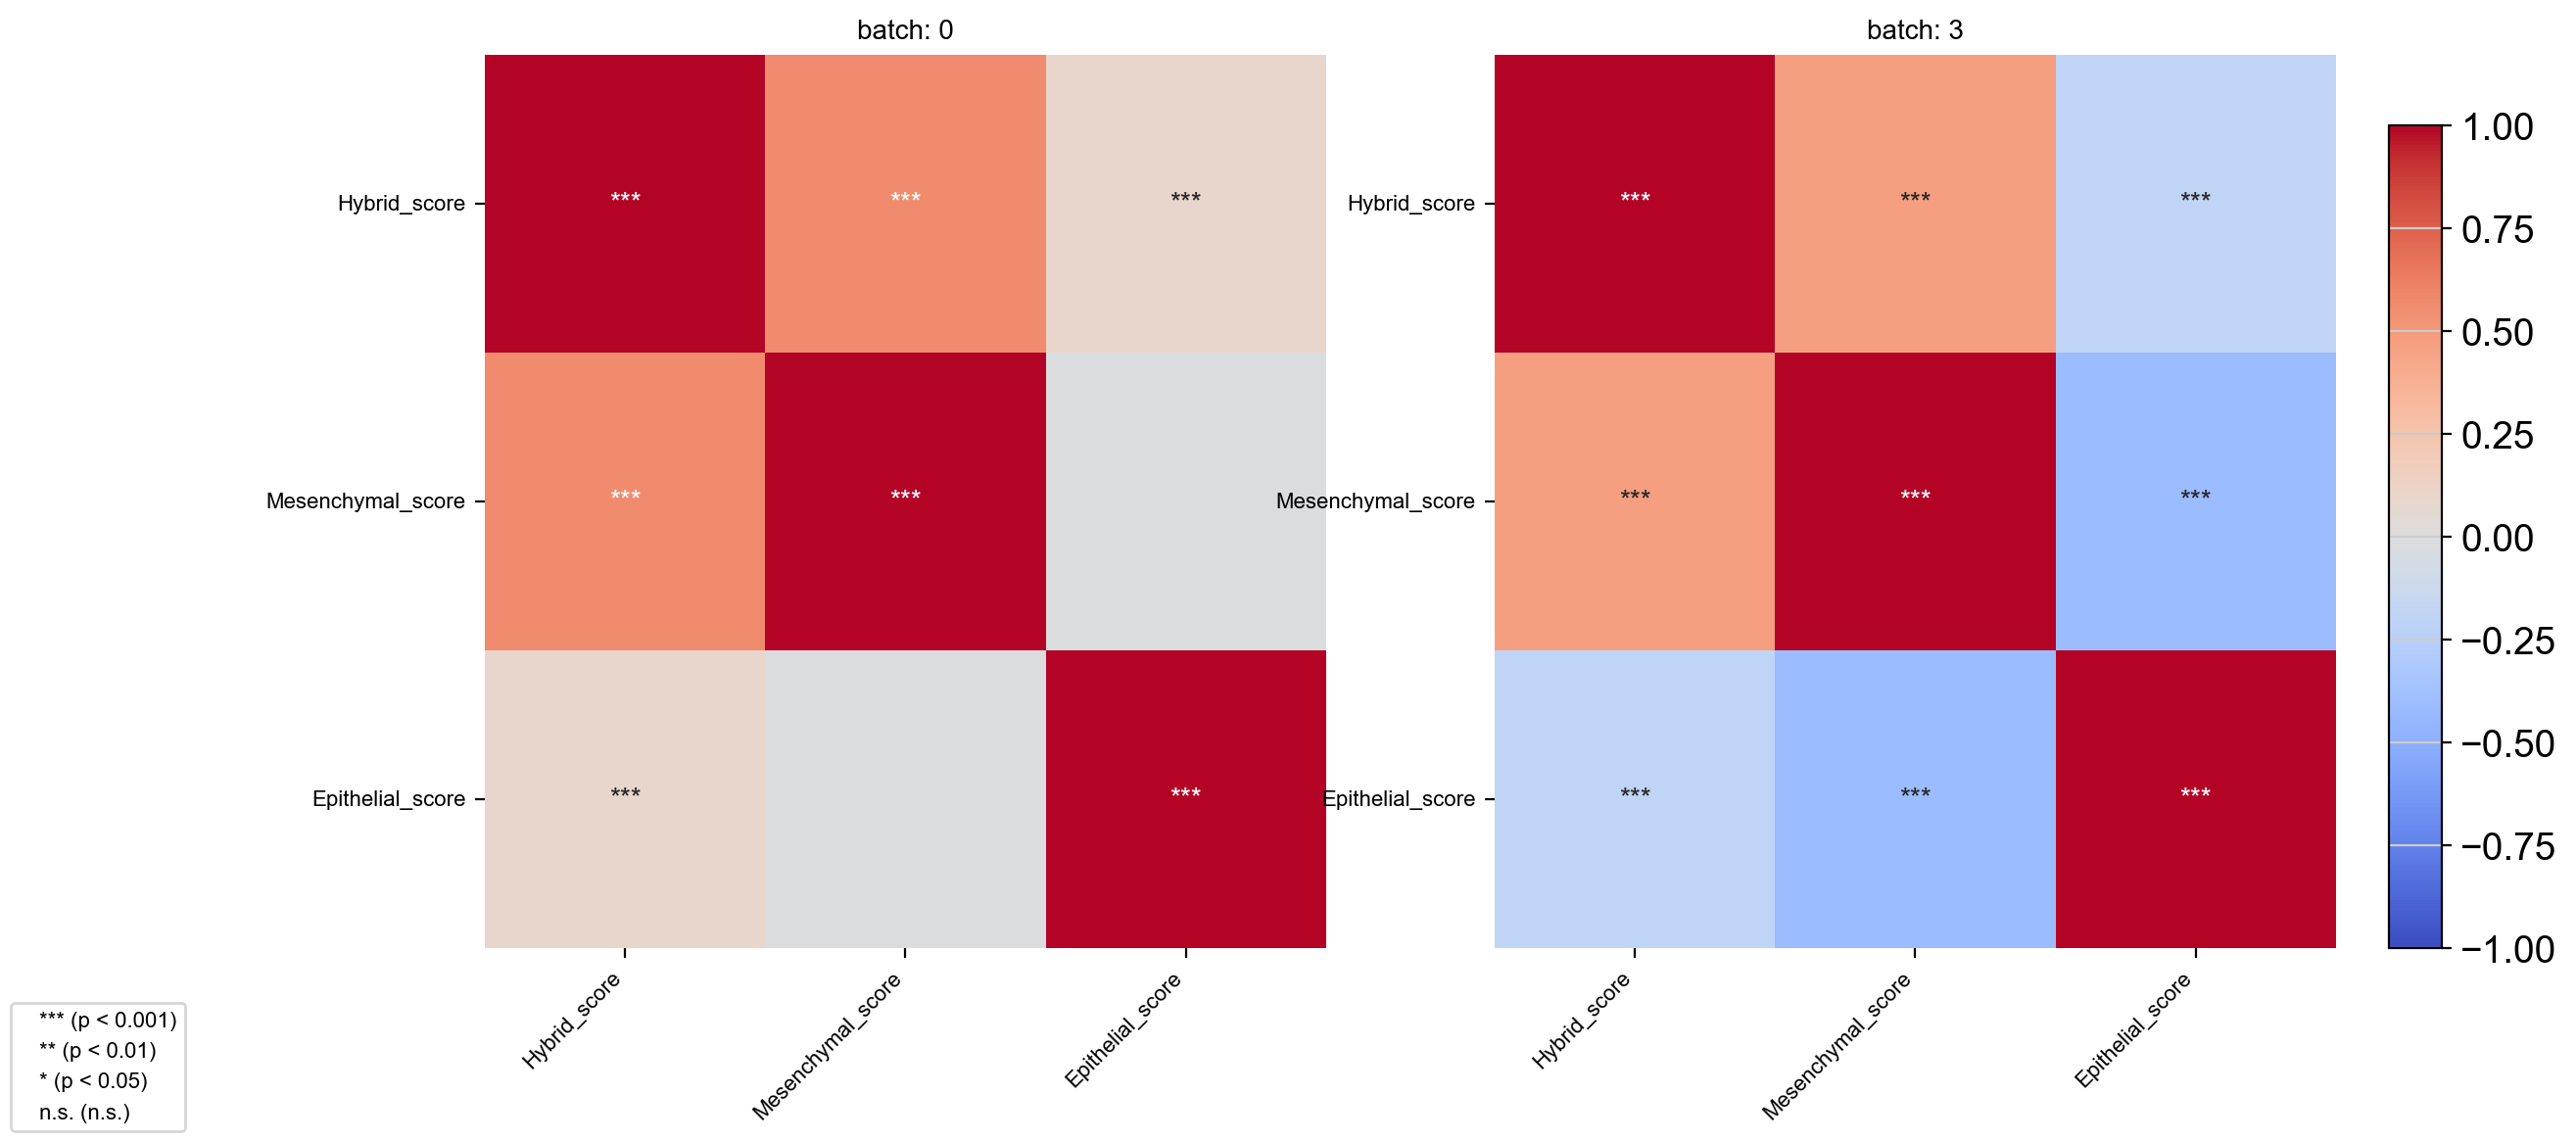

In [14]:
em.pl.signature_correlation_heatmap(
    adata,
    score_keys=["Hybrid_score", "Mesenchymal_score", "Epithelial_score"],
    batch_key="batch"
)

Another way to assess if two signatures are correlated, we can plot Cross-Moran plot per slide. Here, we demonstrate how epithelial and mesenchymal programs are reciprocal programs.

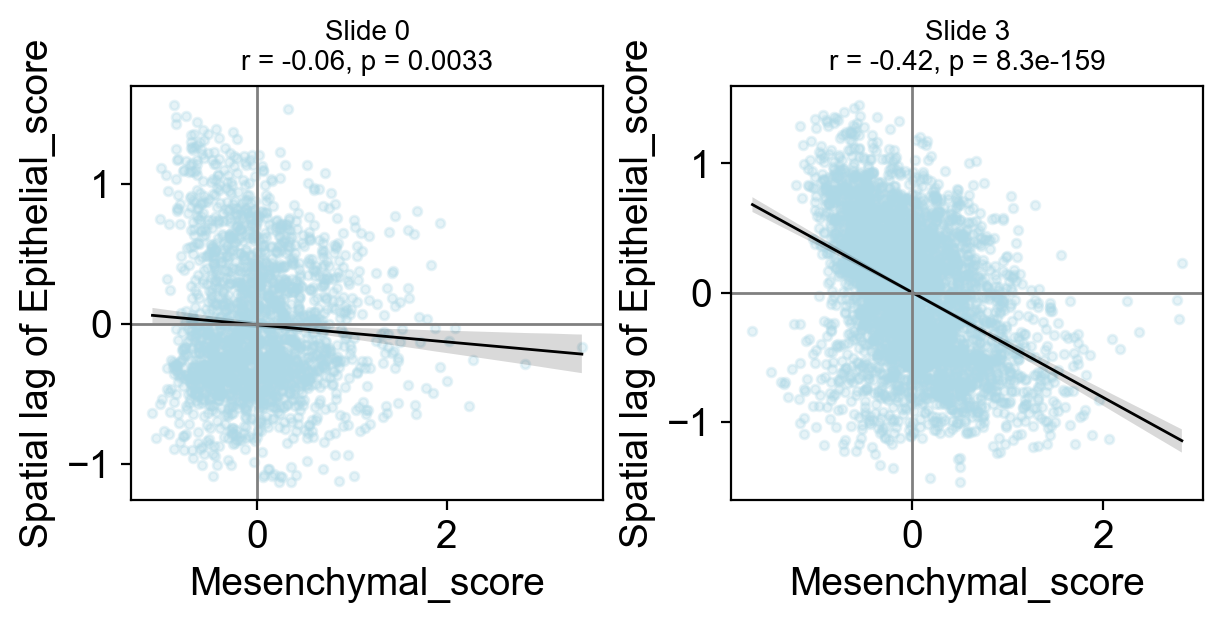

In [15]:
em.pl.cross_moran_scatter(
    adata,
    score_x="Mesenchymal_score",
    score_y="Epithelial_score",
    batch_key="batch"
)